https://huggingface.co/learn/deep-rl-course/en/unit3/deep-q-algorithm
https://www.kaggle.com/code/getanmolgupta01/unsw-nb15-cybersecurity-threat-detection-ann

In [1]:
import os

In [2]:
import pandas as pd

Utilize data from UNSW_NB15 dataset for IDS configuration

In [3]:
# pip install gym torch numpy matplotlib

In [4]:
!pip install gymnasium

In [5]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


In [6]:
honeyiq_source = "/home/caesar/HoneyIQ/datasets/unsw-nb15/filtered/"

In [7]:
honeyiq_datasource_files_unsw_nb15 = os.listdir(honeyiq_source)
honeyiq_datasource_files_unsw_nb15

['binaryX_train_scaled',
 'y_train',
 'binaryy_test',
 'y_test',
 'X_train_scaled',
 'X_test_scaled',
 'binaryX_test_scaled',
 'binaryy_train',
 'binary']

In [8]:
x_train_scaled = pd.read_csv(honeyiq_source + "X_train_scaled")
x_train_scaled.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,1.165206,-0.025317,0.548692,-0.931915,-0.844557,-0.691983,0.694229,1.646995,0.404583,...,-0.970098,-0.068245,0.577350,0.004757,-0.011637,0.003612,0.175977,-0.864329,-0.261147,-3.610910
1,1,0.991424,0.216628,0.728894,-0.515646,-0.844557,0.169123,1.186356,-0.180020,-1.334868,...,-0.970098,-0.993185,0.577350,0.004757,0.019742,0.005901,0.175977,-0.774151,-0.236350,0.125349
2,2,0.460300,0.784716,0.956939,-0.947994,-0.844557,1.635430,0.694229,1.645672,-0.465144,...,-0.970098,0.856694,-1.732051,0.004757,-0.000959,0.003612,0.287333,-0.560715,-0.384190,-0.018291
3,3,0.975774,-0.486855,0.502747,-0.842719,1.184084,-1.679017,0.746421,-1.133989,-1.334868,...,-0.970098,-0.993185,0.577350,0.007978,-0.004760,0.003612,-0.319897,-0.916005,-0.359841,-0.003281
4,4,-1.347929,-0.998860,-1.371714,0.768889,1.184084,0.780340,-1.245871,-0.310205,0.684573,...,1.826366,-0.993185,0.577350,0.005232,0.006957,0.003999,-0.319897,1.369772,1.085366,-0.003281


In [9]:
x_test_scaled = pd.read_csv(honeyiq_source + "X_test_scaled")
x_test_scaled.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,-0.317746,-1.370599,0.492172,0.720189,1.184084,-0.546446,-1.245871,1.638937,0.684573,...,0.938783,0.856694,-1.732051,0.004762,0.006957,0.004155,-0.319897,-0.982684,-3.102516,-0.003281
1,1,-1.380516,-0.998860,-1.371714,0.768889,1.184084,0.780340,-1.245871,-1.184079,-0.465144,...,0.234270,-2.380594,0.577350,0.008376,0.006957,0.004015,-0.319897,1.369772,1.085366,-0.003281
2,2,0.460300,1.366694,0.767570,-0.639557,-0.844557,1.806954,0.694229,-0.501300,-1.334868,...,-0.970098,-0.993185,0.577350,0.004702,-0.010441,0.003612,0.175977,-0.635114,-0.225184,0.709099
3,3,0.769706,1.195066,1.042745,0.374510,-0.844557,-0.594198,0.929505,-0.340955,0.043614,...,-0.970098,0.856694,-1.732051,0.005267,-0.002251,0.003993,0.364140,-0.366087,0.254102,-0.003414
4,4,0.413382,0.839726,0.833279,0.768889,-0.844557,-0.188951,0.650405,-0.909718,-1.334868,...,0.234270,0.856694,-1.732051,0.006670,0.091101,0.002841,0.029990,-0.493226,-0.876312,-1.258729


In [10]:
y_train = pd.read_csv(honeyiq_source + "y_train")
y_train.head()

,Unnamed: 0,threat_level
0,1063276,3
1,1887132,2
2,1060519,0
3,956592,2
4,240824,2


In [11]:
y_test = pd.read_csv(honeyiq_source + "y_test")
y_test.head()

,Unnamed: 0,threat_level
0,463550,0
1,1612385,2
2,2060047,2
3,681781,0
4,100551,0


In [12]:
x_train_scaled.drop(columns=['Unnamed: 0'], inplace=True)
x_test_scaled.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Create the custom environment for the model
import gymnasium as gym
from gymnasium import spaces

In [14]:
import seaborn as sns
import matplotlib

In [15]:
import numpy as np

<p> <b> Define threat levels based on attack levels </b> </p>

In [16]:
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
from collections import deque

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class NetworkThreatEnv(gym.Env):
    def __init__(self, X, y):
        super(NetworkThreatEnv, self).__init__()
        self.X = X  # Features (Pandas DataFrame)
        self.y = y  # Labels (Pandas Series or NumPy array)
        self.current_step = 0
        
        # Define action and observation space
        self.action_space = spaces.Discrete(4)  # 4 threat levels
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(X.shape[1],), dtype=np.float32)
    
    def reset(self):
        self.current_step = 0
        state = self.X.iloc[self.current_step].values  # Access the first row and convert to NumPy array
        return state.astype(np.float32)  # Ensure the state is of type float32
    
    def step(self, action):
        # Check if the episode has ended
        if self.current_step >= len(self.X):
            raise IndexError("Episode has already ended. Call reset() to start a new episode.")

        # print(action)
        # print(self.y.iloc[self.current_step])
        # print(self.current_step)
        # Calculate reward
        if isinstance(self.y, pd.Series):
            reward = 1 if action == self.y.iloc[self.current_step] else -1
        elif isinstance(self.y, np.ndarray):
            reward = 1 if action == self.y[self.current_step] else -1
        else:
            raise ValueError("self.y must be a Pandas Series or NumPy array.")
        
        # Move to the next step
        self.current_step += 1
        
        # Check if the episode has ended
        done = self.current_step >= len(self.X)
        
        # Return the next state
        next_state = np.zeros_like(self.X.iloc[0].values).astype(np.float32) if done else self.X.iloc[self.current_step].values.astype(np.float32)
        return next_state, reward, done, {}

In [19]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore
        state = torch.FloatTensor(state)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()  # Exploit
    
    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        
        # Convert states and next_states to NumPy arrays of type float32
        states = np.array([t[0] for t in minibatch], dtype=np.float32)
        actions = np.array([t[1] for t in minibatch])
        rewards = np.array([t[2] for t in minibatch], dtype=np.float32)
        next_states = np.array([t[3] for t in minibatch], dtype=np.float32)
        dones = np.array([t[4] for t in minibatch], dtype=np.float32)

        # Convert to PyTorch tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)

        # Compute Q-values for current states
        current_q_values = self.model(states).gather(1, actions.unsqueeze(1))

        # Compute Q-values for next states
        next_q_values = self.model(next_states).max(1)[0].detach()
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values

        # Compute loss and update the model
        loss = self.criterion(current_q_values.squeeze(), target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [20]:
!pip3 install stable_baselines3

In [21]:
y_train.head()

,Unnamed: 0,threat_level
0,1063276,3
1,1887132,2
2,1060519,0
3,956592,2
4,240824,2


In [22]:
x_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.165206,-0.025317,0.548692,-0.931915,-0.844557,-0.691983,0.694229,1.646995,0.404583,0.514155,...,-0.970098,-0.068245,0.577350,0.004757,-0.011637,0.003612,0.175977,-0.864329,-0.261147,-3.610910
1,0.991424,0.216628,0.728894,-0.515646,-0.844557,0.169123,1.186356,-0.180020,-1.334868,-1.192657,...,-0.970098,-0.993185,0.577350,0.004757,0.019742,0.005901,0.175977,-0.774151,-0.236350,0.125349
2,0.460300,0.784716,0.956939,-0.947994,-0.844557,1.635430,0.694229,1.645672,-0.465144,-1.192657,...,-0.970098,0.856694,-1.732051,0.004757,-0.000959,0.003612,0.287333,-0.560715,-0.384190,-0.018291
3,0.975774,-0.486855,0.502747,-0.842719,1.184084,-1.679017,0.746421,-1.133989,-1.334868,-1.192657,...,-0.970098,-0.993185,0.577350,0.007978,-0.004760,0.003612,-0.319897,-0.916005,-0.359841,-0.003281
4,-1.347929,-0.998860,-1.371714,0.768889,1.184084,0.780340,-1.245871,-0.310205,0.684573,0.788891,...,1.826366,-0.993185,0.577350,0.005232,0.006957,0.003999,-0.319897,1.369772,1.085366,-0.003281


In [23]:
# from stable_baselines3 import DQN
# from stable_baselines3.common.env_util import make_vec_env

# # Create vectorized environment
# env = make_vec_env(NetworkThreatEnv, n_envs=1)

# # Define and train DQN agent
# model = DQN("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=10000)

# # Save the model
# model.save("unsw_nb15_dqn")

# env = NetworkThreatEnv(x_train_scaled, y_train)
# state = env.reset()  # Should return the first row of X_train as a NumPy array
# print(state)


In [24]:
y_train.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
type(x_train_scaled)


pandas.core.frame.DataFrame

In [27]:
type(y_train.iloc[:,0] )

pandas.core.series.Series

## Training DQN Agent

In [28]:
# Initialize environment and agent
env = NetworkThreatEnv(x_train_scaled, y_train.iloc[:,0] )
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

# Training parameters
batch_size = 32
num_episodes = 1000

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

Episode: 100, Total Reward: -6816, Epsilon: 0.61
Episode: 200, Total Reward: 5046, Epsilon: 0.37
Episode: 300, Total Reward: 17182, Epsilon: 0.22
Episode: 400, Total Reward: 19306, Epsilon: 0.13
Episode: 500, Total Reward: 26154, Epsilon: 0.08
Episode: 600, Total Reward: 26854, Epsilon: 0.05
Episode: 700, Total Reward: 24816, Epsilon: 0.03
Episode: 800, Total Reward: 26268, Epsilon: 0.02
Episode: 900, Total Reward: 31206, Epsilon: 0.01
Episode: 1000, Total Reward: 31872, Epsilon: 0.01


## Evaluate DQN Agent

In [29]:
# Create a test environment
test_env = NetworkThreatEnv(x_test_scaled, y_test.iloc[:,0])

# Evaluate the agent
correct_predictions = 0
total_predictions = len(x_test_scaled)

state = test_env.reset()
state = np.reshape(state, [1, state_size])
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = test_env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state

    if reward == 1:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 83.64%


In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_agent(env, agent):
    """
    Evaluate the DQN agent and compute metrics.
    
    Returns:
        dict: Dictionary containing accuracy, precision, recall, and F1-score.
    """
    all_preds = []
    all_true = []
    
    state = env.reset()
    done = False
    
    while not done:
        action = agent.act(state)  # Model's prediction
        next_state, reward, done, _ = env.step(action)
        
        # Store prediction and true label
        all_preds.append(action)
        all_true.append(env.y[env.current_step - 1])  # Previous step's true label
        
        state = next_state
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(all_true, all_preds),
        'precision': precision_score(all_true, all_preds, average='weighted'),
        'recall': recall_score(all_true, all_preds, average='weighted'),
        'f1': f1_score(all_true, all_preds, average='weighted')
    }
    
    cm = confusion_matrix(all_true, all_preds)
    
    return metrics, cm


In [31]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names=None):
    """
    Plot a confusion matrix using seaborn.
    
    Args:
        cm (np.array): Confusion matrix from sklearn.
        class_names (list): Names of classes (e.g., threat levels).
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [34]:
# Evaluate
metrics = evaluate_agent(test_env, agent)
metrics
# Print results
# print(f"Accuracy: {metrics['accuracy']:.4f}")
# print(f"Precision: {metrics['precision']:.4f}")
# print(f"Recall: {metrics['recall']:.4f}")
# print(f"F1-Score: {metrics['f1']:.4f}")

({'accuracy': 0.83625,
  'precision': 0.8370873059427919,
  'recall': 0.83625,
  'f1': 0.8363130395455772},
 array([[2953,   10,    8,   13],
        [   6, 2287,  213,  419],
        [   5,  414, 2535,  123],
        [   6,  348,  400, 2260]]))

Evaluation Metrics:
Accuracy: 0.8368
Precision: 0.8378
Recall: 0.8368
F1: 0.8369


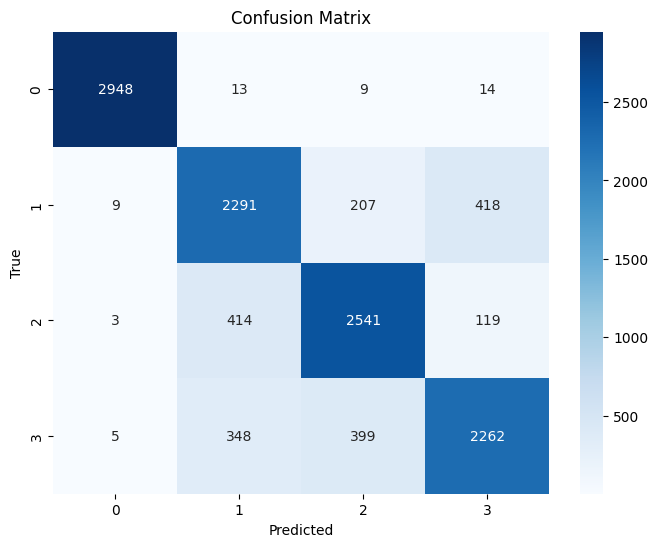

In [35]:
# Initialize test environment
test_env = NetworkThreatEnv(x_test_scaled, y_test.values)  # Ensure y_test is a NumPy array

# Evaluate and get metrics + confusion matrix
metrics, cm = evaluate_agent(test_env, agent)

# Print metrics
print("Evaluation Metrics:")
for name, value in metrics.items():
    print(f"{name.capitalize()}: {value:.4f}")

# Plot confusion matrix
class_names = ['0', '1', '2', '3']  # Replace with your actual class names
plot_confusion_matrix(cm, class_names)